In [27]:
num_samples = 1000
num_features = 2
w_true = nd.array([1.5, 3.6])
b_true = nd.array([2.5])

In [2]:
from mxnet import nd
from mxnet import autograd as ag

In [3]:
nd.array([1, 2, 3])


[ 1.  2.  3.]
<NDArray 3 @cpu(0)>

In [28]:
x_train = nd.random_normal(0, 1, shape=(num_samples, num_features))
y_train = nd.dot(x_train, w_true.T) + b_true
y_train += 0.01 * nd.random_normal(0, 0.01, shape=y_train.shape)
print x_train[0]
print y_train[0]


[-0.97082031  0.14644662]
<NDArray 2 @cpu(0)>

[ 1.57106698]
<NDArray 1 @cpu(0)>


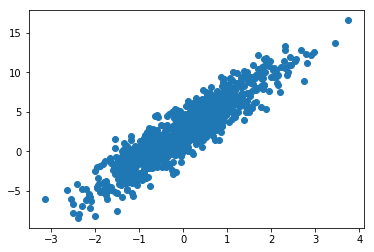

In [30]:
import matplotlib.pyplot as plt
plt.scatter(x_train[:, 1].asnumpy(), y_train.asnumpy())
plt.show()

In [110]:
import random
import numpy as np

batch_size = 100

def data_iter():
    idx = list(range(num_samples))
    random.shuffle(idx)
    for i in range(0, num_samples, batch_size):
        j = nd.array(idx[i:min(i + batch_size, num_samples)])
        yield nd.take(x_train, j), nd.take(y_train, j)
# print "data_iter:", data_iter()
# for data, label in data_iter():
#     print data, label
#     break


In [122]:
import math
def cost_func(h_y, y_true):
    return nd.sum((h_y - y_true) ** 2)

In [188]:
param_w = nd.random_normal(0, 1, shape=w_true.shape)
param_b = nd.random_normal(0, 1, shape=b_true.shape)
params = [param_w, param_b]
print params
for param in params:
    param.attach_grad()

[
[ 0.10911477 -1.40012491]
<NDArray 2 @cpu(0)>, 
[ 0.06567451]
<NDArray 1 @cpu(0)>]


In [105]:
def net(x, w, b):
    y_h = nd.dot(x, w.T) + b
    return y_h

In [117]:
def SGD(params, learning_rate):
    for param in params:
        param[:] = param - learning_rate * param.grad

In [183]:
# 模型函数
def real_fn(X):
    return 1.5 * X[:, 0] + 3.5 * X[:, 1] + 2.5
# 绘制损失随训练次数降低的折线图，以及预测值和真实值的散点图
def plot(losses, X, sample_size=100):
    xs = list(range(len(losses)))
    f, (fg1, fg2) = plt.subplots(1, 2)
    fg1.set_title('Loss during training')
    fg1.plot(xs, losses, '-r')
    fg2.set_title('Estimated vs real function')
    fg2.plot(X[:sample_size, 1].asnumpy(),
             net(X[:sample_size, :], param_w, param_b).asnumpy(), 'or', label='Estimated')
    fg2.plot(X[:sample_size, 1].asnumpy(),
             real_fn(X[:sample_size, :]).asnumpy(), '*g', label='Real')
    fg2.legend()
    plt.show()

Epoch 0, batch 1. Moving avg of loss: 1.5234646753e-06. Average loss: 0.000000


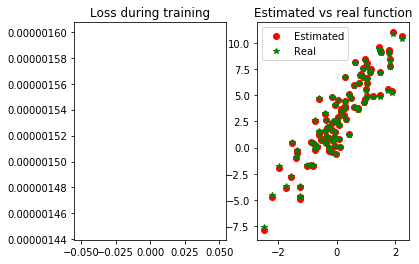

Epoch 0, batch 2. Moving avg of loss: 1.42111367214e-06. Average loss: 0.000000


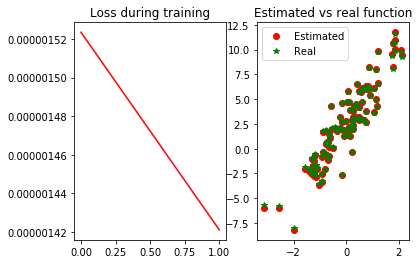

Epoch 0, batch 3. Moving avg of loss: 1.33543993361e-06. Average loss: 0.000000


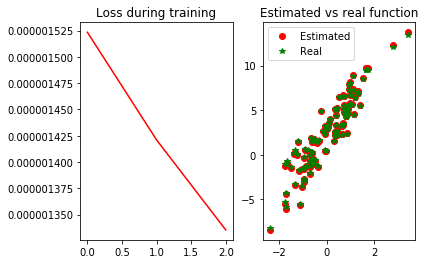

Epoch 0, batch 4. Moving avg of loss: 1.23326595743e-06. Average loss: 0.000000


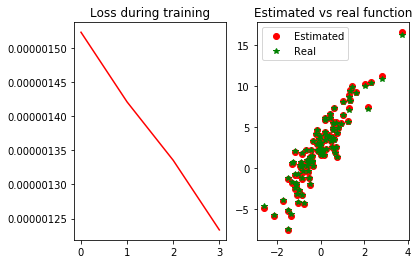

Epoch 0, batch 5. Moving avg of loss: 1.21444546427e-06. Average loss: 0.000000


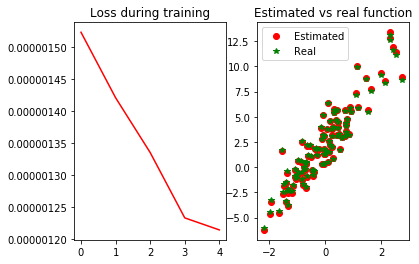

Epoch 0, batch 6. Moving avg of loss: 1.19690282796e-06. Average loss: 0.000000


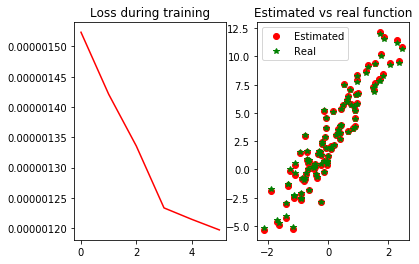

Epoch 0, batch 7. Moving avg of loss: 1.17582130264e-06. Average loss: 0.000000


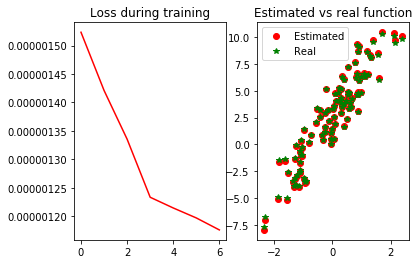

Epoch 0, batch 8. Moving avg of loss: 1.15498846804e-06. Average loss: 0.000000


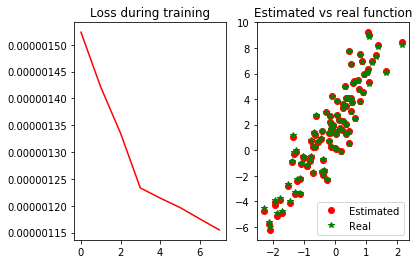

Epoch 0, batch 9. Moving avg of loss: 1.17548260256e-06. Average loss: 0.000000


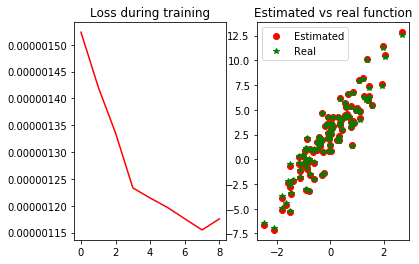

Epoch 0, batch 10. Moving avg of loss: 1.16636738458e-06. Average loss: 0.000000


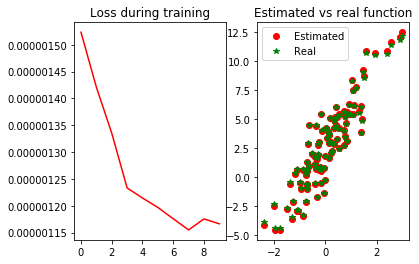

epoch: 0 total_loss: 1.16846666742e-05
Epoch 1, batch 11. Moving avg of loss: 1.13990269559e-06. Average loss: 0.000000


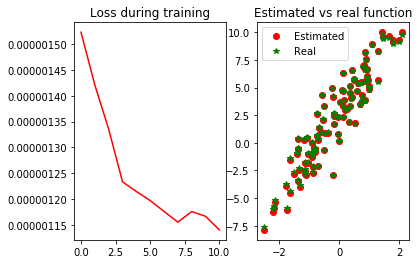

Epoch 1, batch 12. Moving avg of loss: 1.1307251953e-06. Average loss: 0.000000


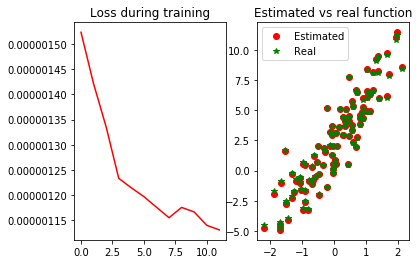

Epoch 1, batch 13. Moving avg of loss: 1.14467777218e-06. Average loss: 0.000000


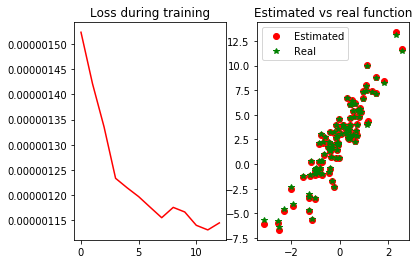

Epoch 1, batch 14. Moving avg of loss: 1.122939553e-06. Average loss: 0.000000


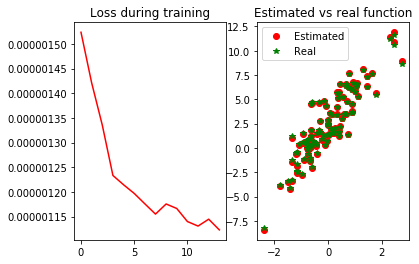

Epoch 1, batch 15. Moving avg of loss: 1.1277414878e-06. Average loss: 0.000000


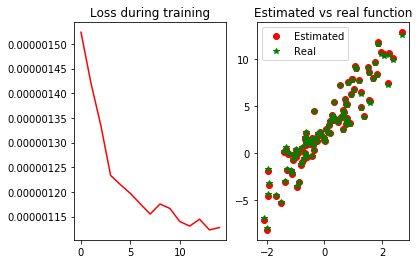

Epoch 1, batch 16. Moving avg of loss: 1.1428722255e-06. Average loss: 0.000000


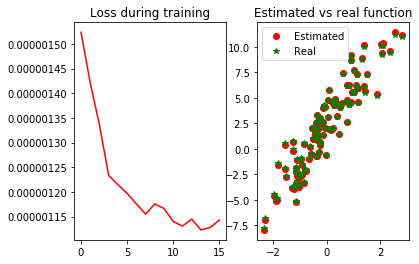

Epoch 1, batch 17. Moving avg of loss: 1.12956224962e-06. Average loss: 0.000000


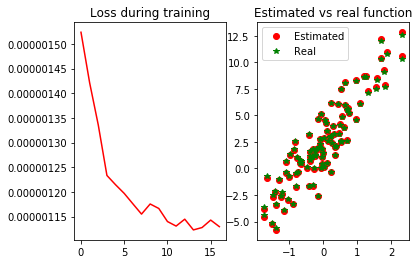

Epoch 1, batch 18. Moving avg of loss: 1.12987471436e-06. Average loss: 0.000000


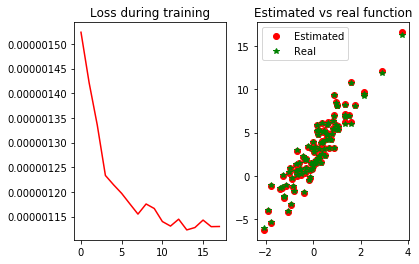

Epoch 1, batch 19. Moving avg of loss: 1.12142807684e-06. Average loss: 0.000000


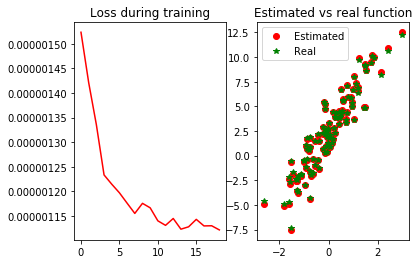

Epoch 1, batch 20. Moving avg of loss: 1.11667048737e-06. Average loss: 0.000000


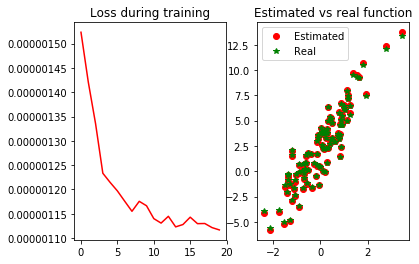

epoch: 1 total_loss: 1.07150250983e-05
Epoch 2, batch 21. Moving avg of loss: 1.12313778119e-06. Average loss: 0.000000


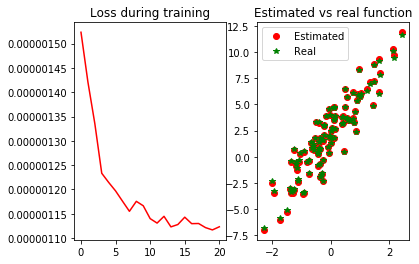

Epoch 2, batch 22. Moving avg of loss: 1.13724003201e-06. Average loss: 0.000000


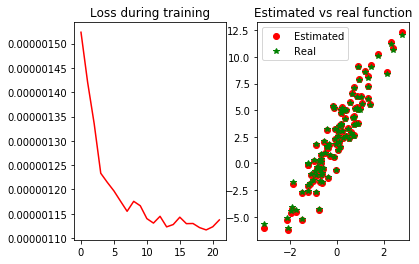

Epoch 2, batch 23. Moving avg of loss: 1.13095953916e-06. Average loss: 0.000000


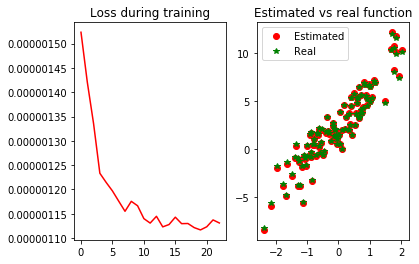

Epoch 2, batch 24. Moving avg of loss: 1.11354210334e-06. Average loss: 0.000000


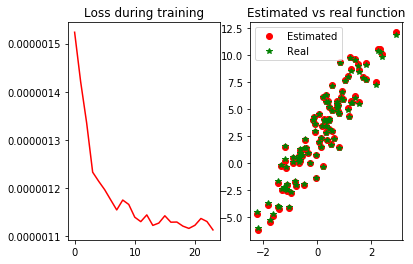

Epoch 2, batch 25. Moving avg of loss: 1.11594464192e-06. Average loss: 0.000000


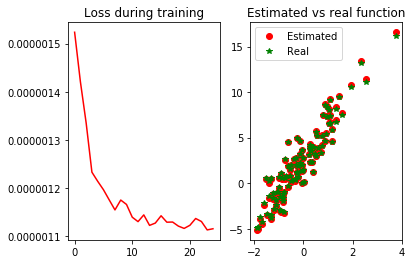

Epoch 2, batch 26. Moving avg of loss: 1.10840598131e-06. Average loss: 0.000000


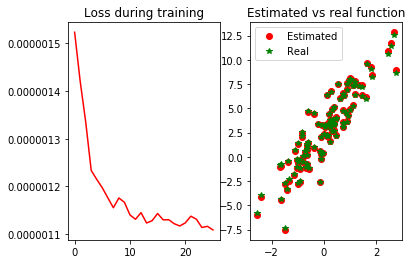

Epoch 2, batch 27. Moving avg of loss: 1.10510224637e-06. Average loss: 0.000000


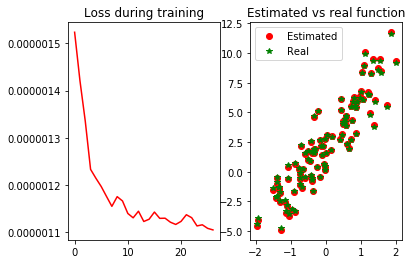

Epoch 2, batch 28. Moving avg of loss: 1.09442105575e-06. Average loss: 0.000000


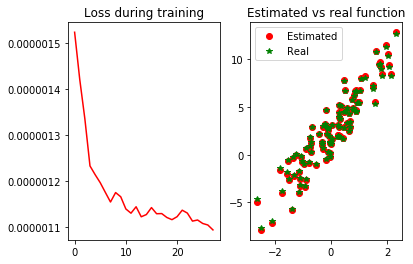

Epoch 2, batch 29. Moving avg of loss: 1.09382927759e-06. Average loss: 0.000000


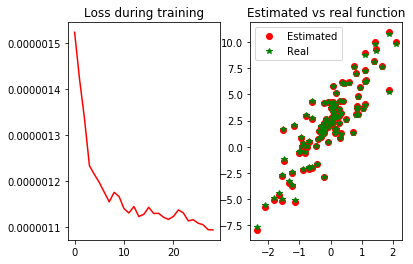

Epoch 2, batch 30. Moving avg of loss: 1.09912984305e-06. Average loss: 0.000000


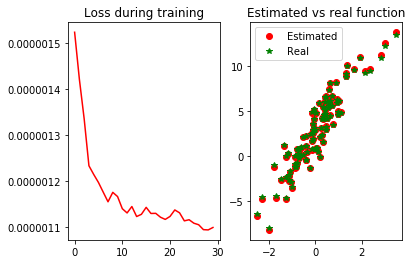

epoch: 2 total_loss: 1.07016687707e-05
Epoch 3, batch 31. Moving avg of loss: 1.10077369666e-06. Average loss: 0.000000


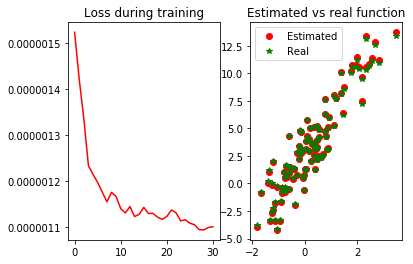

Epoch 3, batch 32. Moving avg of loss: 1.09983574053e-06. Average loss: 0.000000


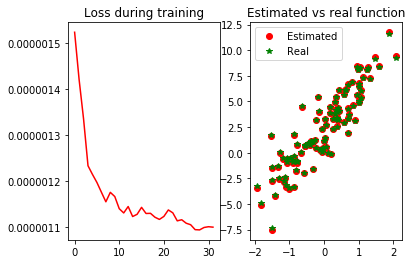

Epoch 3, batch 33. Moving avg of loss: 1.09924726602e-06. Average loss: 0.000000


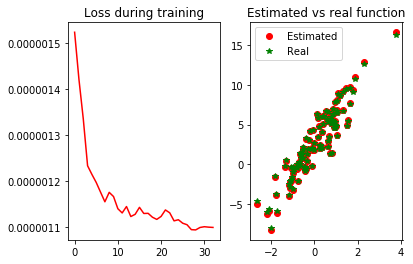

Epoch 3, batch 34. Moving avg of loss: 1.10203739401e-06. Average loss: 0.000000


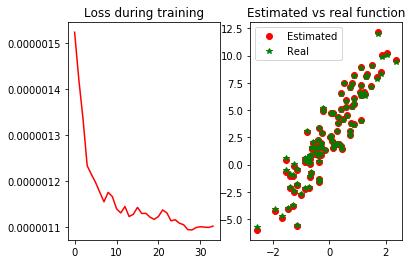

Epoch 3, batch 35. Moving avg of loss: 1.10061125564e-06. Average loss: 0.000000


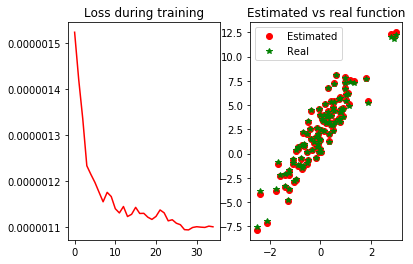

Epoch 3, batch 36. Moving avg of loss: 1.09338829397e-06. Average loss: 0.000000


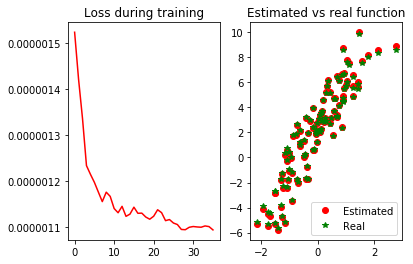

Epoch 3, batch 37. Moving avg of loss: 1.09397153394e-06. Average loss: 0.000000


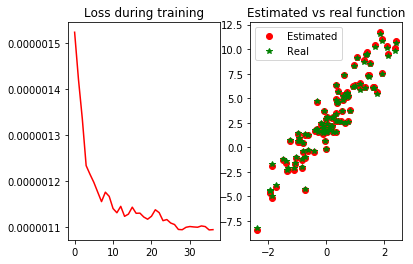

Epoch 3, batch 38. Moving avg of loss: 1.09137581448e-06. Average loss: 0.000000


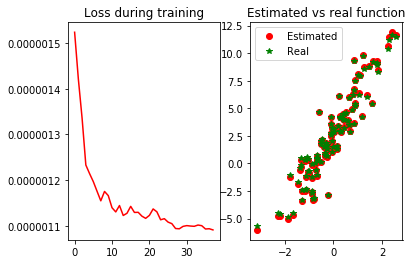

Epoch 3, batch 39. Moving avg of loss: 1.08655522311e-06. Average loss: 0.000000


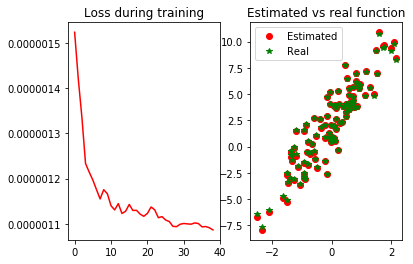

Epoch 3, batch 40. Moving avg of loss: 1.0909861079e-06. Average loss: 0.000000


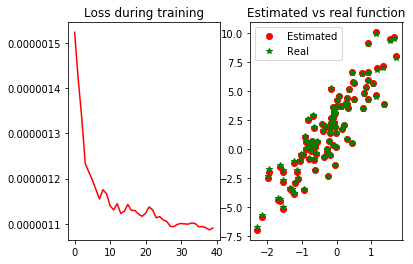

epoch: 3 total_loss: 1.07137819896e-05
Epoch 4, batch 41. Moving avg of loss: 1.09297253822e-06. Average loss: 0.000000


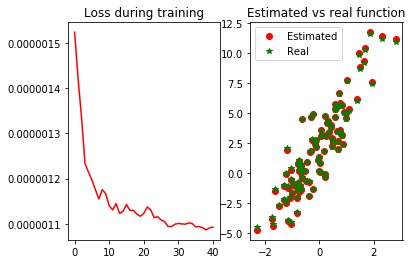

Epoch 4, batch 42. Moving avg of loss: 1.08707807815e-06. Average loss: 0.000000


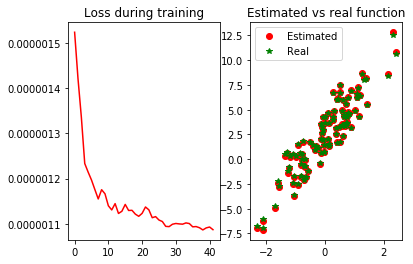

Epoch 4, batch 43. Moving avg of loss: 1.09168632748e-06. Average loss: 0.000000


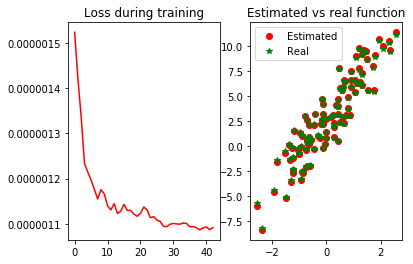

Epoch 4, batch 44. Moving avg of loss: 1.09055834348e-06. Average loss: 0.000000


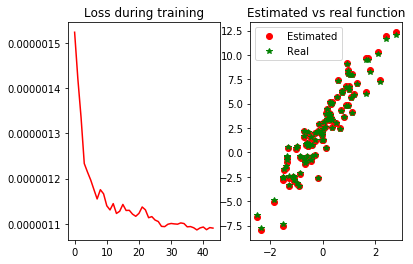

Epoch 4, batch 45. Moving avg of loss: 1.09182769283e-06. Average loss: 0.000000


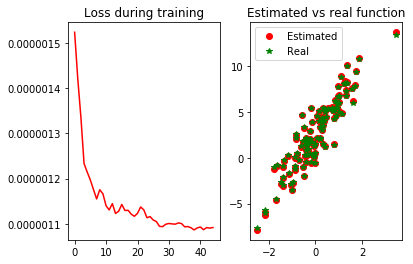

Epoch 4, batch 46. Moving avg of loss: 1.09368998507e-06. Average loss: 0.000000


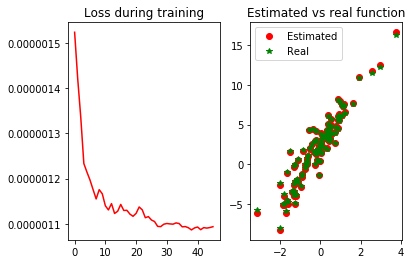

Epoch 4, batch 47. Moving avg of loss: 1.09065656174e-06. Average loss: 0.000000


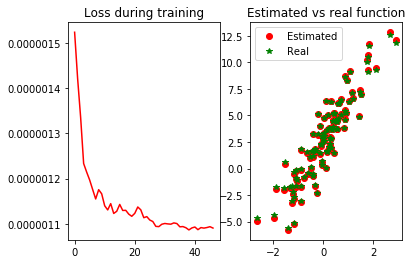

Epoch 4, batch 48. Moving avg of loss: 1.08640339162e-06. Average loss: 0.000000


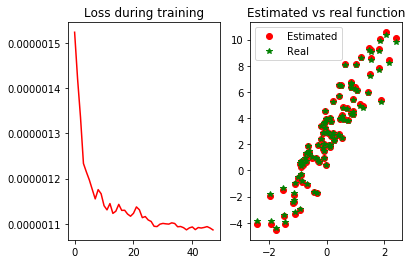

Epoch 4, batch 49. Moving avg of loss: 1.0836253711e-06. Average loss: 0.000000


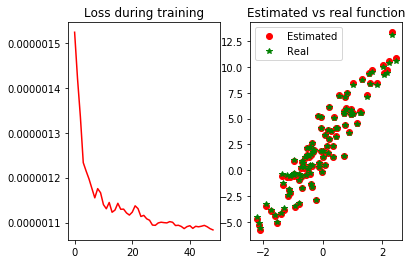

Epoch 4, batch 50. Moving avg of loss: 1.08627788532e-06. Average loss: 0.000000


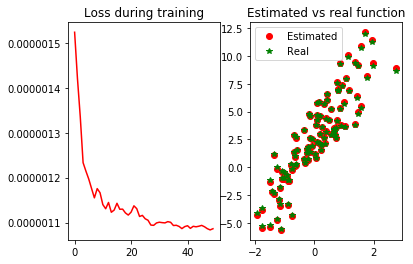

epoch: 4 total_loss: 1.07198738419e-05


In [190]:
learning_rate = 0.001
iter_num = 5
niter = 0
losses = []
moving_loss = 0
smoothing_constant = .01

for e in range(iter_num):
    total_loss = 0
    for data, label in data_iter():
        with ag.record():
            y_hy = net(data, param_w, param_b)
            loss = cost_func(y_hy, label)
        loss.backward()
        SGD(params, learning_rate)
        total_loss += nd.sum(loss).asscalar()
        
        # 记录每读取一个数据点后，损失的移动平均值的变化；
        niter +=1
        curr_loss = nd.mean(loss).asscalar()
        moving_loss = (1 - smoothing_constant) * moving_loss + (smoothing_constant) * curr_loss

        # correct the bias from the moving averages
        est_loss = moving_loss/(1-(1-smoothing_constant)**niter)

#         if niter % 100 == 0:
        losses.append(est_loss)
        print("Epoch %s, batch %s. Moving avg of loss: %s. Average loss: %f" % (e, niter, est_loss, total_loss/num_samples))
        plot(losses, data)
    print "epoch:", e, "total_loss:", total_loss

In [192]:
print param_w, param_b
print w_true, b_true


[ 1.49999964  3.60000229]
<NDArray 2 @cpu(0)> 
[ 2.49999952]
<NDArray 1 @cpu(0)>

[ 1.5        3.5999999]
<NDArray 2 @cpu(0)> 
[ 2.5]
<NDArray 1 @cpu(0)>
